## Python Basic

In [1]:
a = 500
exchange = 30
a * exchange

15000

## 資料分析範例

In [3]:
import requests
res = requests.get('https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E8%B5%B0%E5%8B%A2%E5%9C%96/%E6%AF%94%E7%89%B9%E5%B9%A3/twd')
#res.text

In [17]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
price = soup.select('#coin_maxd_historical_price_chart')[0].prettify('utf-8').decode('utf-8')

In [19]:
#price

In [23]:
import re
m = re.search('(\[\[.*?\]\])', price)
price_str = eval(m.group(1).replace('null', 'None'))

In [25]:
import pandas
df = pandas.DataFrame(price_str)

In [37]:
df.head()

,time,price,mvg
time,,,
1.367107e+12,1.367107e+12,NaN,NaN
1.367194e+12,1.367194e+12,4262.3287,NaN
1.367280e+12,1.367280e+12,4104.9241,NaN
1.367366e+12,1.367366e+12,3433.0342,NaN
1.367453e+12,1.367453e+12,3136.7031,NaN


In [30]:
df.columns = ['time', 'price']

In [31]:
df.index= df['time']

In [36]:
df['price'].describe()

count      1562.000000
mean      18639.201581
std       17233.633992
min        1998.655400
25%        8055.343325
50%       14085.567300
75%       21059.214075
max      108321.776257
Name: price, dtype: float64

Populating the interactive namespace from numpy and matplotlib


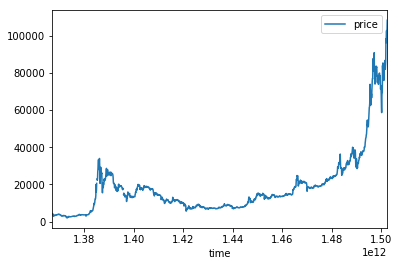

In [32]:
%pylab inline
df[['price']].plot(kind = 'line')

In [33]:
df['mvg'] =  df['price'].rolling(window = 30).mean()

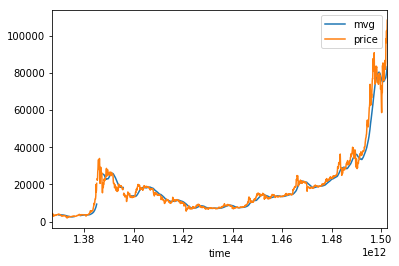

In [35]:
df[['mvg', 'price']].plot(kind = 'line')

## 語音辨識

In [1]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

In [2]:
r.recognize_google(audio, language='zh-TW')

'大家好我今天來上課大家好不好早就要去做些辨認'

## 讓電腦說話

In [5]:
from gtts import gTTS
from pygame import mixer
import tempfile

from pygame import mixer
mixer.init()
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()

In [6]:
speak('九四八七九四狂')

## Python 數值運算

In [8]:
3+2*8

19

In [9]:
# int a = 3
a = 3
b = 2

In [10]:
a + b 

5

In [11]:
a - b 

1

In [13]:
c = 2.5
d = 1.5
c + d
c - d

1.0

In [14]:
print(c + d)
print(c - d)

4.0
1.0


In [15]:
3 + 2

5

In [16]:
'3' + 2

TypeError: must be str, not int

In [17]:
type('3')

str

In [18]:
type(2)

int

In [19]:
a = 5

In [21]:
a

5

In [22]:
a + a

10

In [23]:
a = 10

In [24]:
a

10

In [25]:
a = a + a

In [26]:
a

20

In [27]:
price = 25.6
exchange_rate = 32.33

In [28]:
ntd_price = price * exchange_rate

In [29]:
ntd_price

827.648

## 字串處理

In [30]:
a = 'this is a book'
a

'this is a book'

In [32]:
type(a)

str

In [31]:
b = "this is also a book"
b

'thisi is also a book'

In [33]:
type(b)

str

In [34]:
s = 'i'm twenty years old'
s

SyntaxError: invalid syntax (<ipython-input-34-dc0f0b7e45c6>, line 1)

In [35]:
s = "i'm twenty years old"
s

"i'm twenty years old"

In [36]:
'Hello World'

'Hello World'

In [37]:
print('Hello World')

Hello World


In [41]:
print('寳寶心理苦 但寳寶不說')
print('hello there')
print('\n')
print('this is the end')

寳寶心理苦 但寳寶不說
hello there


this is the end


In [42]:
print('this is the first line this is the second line')

this is the first line this is the second line


In [43]:
print('this is the first line\nthis is the second line')

this is the first line
this is the second line


In [44]:
print('col1 col2 col3\n100 10000 1000\n99 1000 2000')

col1 col2 col3
100 10000 1000
99 1000 2000


In [45]:
print('col1\tcol2\tcol3\n100\t10000\t1000\n99\t1000\t2000')

col1	col2	col3
100	10000	1000
99	1000	2000


In [46]:
a = 'this is a looooooooooooooooooooooooooooong  teeeeeeeeeeeeeeeext'
a

'this is a looooooooooooooooooooooooooooong  teeeeeeeeeeeeeeeext'

In [48]:
a = 'this is a \
looooooooooooooooooooooooooooong  \
teeeeeeeeeeeeeeeext'
a

'this is a looooooooooooooooooooooooooooong  teeeeeeeeeeeeeeeext'

In [50]:
article = '''
北韓今日發布最新集會系列照片，有許多民眾聚集平壤廣場，抗議聯合國與美國制裁北韓，北韓官方更稱在這短短3日內，已經有將近350萬人報名從軍，打倒美帝。
據北韓官媒《勞動新聞》報導，北韓人民為了為己的自主權與生存權，對於聯合國的無理制裁相當憤怒，更對「美帝」的戰爭狂妄非常「有感」，因此許多北韓人決定「千百倍奉還」。報導更稱，在這短短的3天內，就有347.5萬人報名從軍，準備打倒美帝。
今日稍早美國總統川普則再度對北韓警告，稱美國的軍事武裝皆已準備好，「隨時上膛」。（施旖婕／綜合外電報導）
'''
article

'\n北韓今日發布最新集會系列照片，有許多民眾聚集平壤廣場，抗議聯合國與美國制裁北韓，北韓官方更稱在這短短3日內，已經有將近350萬人報名從軍，打倒美帝。\n據北韓官媒《勞動新聞》報導，北韓人民為了為己的自主權與生存權，對於聯合國的無理制裁相當憤怒，更對「美帝」的戰爭狂妄非常「有感」，因此許多北韓人決定「千百倍奉還」。報導更稱，在這短短的3天內，就有347.5萬人報名從軍，準備打倒美帝。\n今日稍早美國總統川普則再度對北韓警告，稱美國的軍事武裝皆已準備好，「隨時上膛」。（施旖婕／綜合外電報導）\n'

In [54]:
s = 'Hello'
print(s[0])
print(s[1])
print(s[-1])
print(s[-2])

H
e
o
l


In [56]:
s = '寳寶心理苦 但寳寶不說'
print(s[0])
print(s[-1])

寳
說


In [60]:
s = '寳寶心理苦 但寳寶不說'
print(s[ 1 : ])
print(s[ : 3])
print(s[:])

寶心理苦 但寳寶不說
寳寶心
寳寶心理苦 但寳寶不說


In [59]:
news = '[新聞] 瞧不起蔡英文 切割民進黨?柯文哲嗆姚立明'
news[1:3]

'新聞'

In [63]:
# for(i = 0 ; i< len(s); i++)
s = '寳寶心理苦 但寳寶不說'
print(s[ 0 : len(s) : 1 ])
print(s[::1])

寳寶心理苦 但寳寶不說
寳寶心理苦 但寳寶不說


In [64]:
# for(i = 0 ; i< len(s); i+=2)
s = '寳寶心理苦 但寳寶不說'
print(s[ 0 : len(s) : 2 ])
print(s[::2])

寳心苦但寶說
寳心苦但寶說


In [65]:
#for(i = len(s) ; i > 0; i -- )
print(s[::-1])

說不寶寳但 苦理心寶寳


In [70]:
s = '上海自來水來自海上'
s[::] == s[::-1]

True

In [71]:
s1 = 'this is a sentence'
s2 = 'concat me'
s1 + s2

'this is a sentenceconcat me'

In [72]:
letter = '?'
letter * 10

'??????????'

In [76]:
s = 'I love this book'
print(s.upper())
print(s.lower())
print(s.title())
print(s.split())

I LOVE THIS BOOK
i love this book
I Love This Book
['I', 'love', 'this', 'book']


In [77]:
dir(s)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [78]:
help(s.count)

Help on built-in function count:

count(...) method of builtins.str instance
    S.count(sub[, start[, end]]) -> int
    
    Return the number of non-overlapping occurrences of substring sub in
    string S[start:end].  Optional arguments start and end are
    interpreted as in slice notation.



In [79]:
?s.count

In [80]:
article = '''
北韓今日發布最新集會系列照片，有許多民眾聚集平壤廣場，抗議聯合國與美國制裁北韓，北韓官方更稱在這短短3日內，已經有將近350萬人報名從軍，打倒美帝。
據北韓官媒《勞動新聞》報導，北韓人民為了為己的自主權與生存權，對於聯合國的無理制裁相當憤怒，更對「美帝」的戰爭狂妄非常「有感」，因此許多北韓人決定「千百倍奉還」。報導更稱，在這短短的3天內，就有347.5萬人報名從軍，準備打倒美帝。
今日稍早美國總統川普則再度對北韓警告，稱美國的軍事武裝皆已準備好，「隨時上膛」。（施旖婕／綜合外電報導）
'''
article.count('北韓')

7

In [81]:
article.replace('川普','Trump')

'\n北韓今日發布最新集會系列照片，有許多民眾聚集平壤廣場，抗議聯合國與美國制裁北韓，北韓官方更稱在這短短3日內，已經有將近350萬人報名從軍，打倒美帝。\n據北韓官媒《勞動新聞》報導，北韓人民為了為己的自主權與生存權，對於聯合國的無理制裁相當憤怒，更對「美帝」的戰爭狂妄非常「有感」，因此許多北韓人決定「千百倍奉還」。報導更稱，在這短短的3天內，就有347.5萬人報名從軍，準備打倒美帝。\n今日稍早美國總統Trump則再度對北韓警告，稱美國的軍事武裝皆已準備好，「隨時上膛」。（施旖婕／綜合外電報導）\n'

In [82]:
len(article)

246

In [83]:
article.split('，')

['\n北韓今日發布最新集會系列照片',
 '有許多民眾聚集平壤廣場',
 '抗議聯合國與美國制裁北韓',
 '北韓官方更稱在這短短3日內',
 '已經有將近350萬人報名從軍',
 '打倒美帝。\n據北韓官媒《勞動新聞》報導',
 '北韓人民為了為己的自主權與生存權',
 '對於聯合國的無理制裁相當憤怒',
 '更對「美帝」的戰爭狂妄非常「有感」',
 '因此許多北韓人決定「千百倍奉還」。報導更稱',
 '在這短短的3天內',
 '就有347.5萬人報名從軍',
 '準備打倒美帝。\n今日稍早美國總統川普則再度對北韓警告',
 '稱美國的軍事武裝皆已準備好',
 '「隨時上膛」。（施旖婕／綜合外電報導）\n']

## Python List

In [84]:
height = 175
heights = [170,165,175]
heights[0]

170

In [91]:
a = ['hello world', 3]
print(type(a))

print(a[0])
print(type(a[0]))

print(a[1])
print(type(a[1]))

print(a[1] + 5)

<class 'list'>
hello world
<class 'str'>
3
<class 'int'>
8


In [92]:
s = 'word'
print(list(s))

['w', 'o', 'r', 'd']


In [93]:
print([ ['list 1'], ['list2-0','list2-1'] ])

[['list 1'], ['list2-0', 'list2-1']]


In [98]:
a = [5,6,7,'s']
print(a[0])
print(a[-1])
print(a[2:4])
print(a[2:100])
print(a[2:])

5
s
[7, 's']
[7, 's']
[7, 's']


In [101]:
print(a)
print(a[:])
print(a[::])

[5, 6, 7, 's']
[5, 6, 7, 's']
[5, 6, 7, 's']


In [102]:
print(a[::2])

[5, 7]


In [103]:
print(a[::-1])

['s', 7, 6, 5]


In [104]:
print(len(a))

4


In [108]:
a = [5,6,7,8]
print(max(a))
print(min(a))
print(sum(a))

8
5
26


In [110]:
sum = 30
print(sum(a))

TypeError: 'int' object is not callable

In [111]:
del sum

In [112]:
print(sum(a))

26


In [116]:
a = [5,6,7,8]
a.pop()
print(a)

a.append(2)
print(a)

a.sort()
print(a)

a.reverse()
print(a)

[5, 6, 7]
[5, 6, 7, 2]
[2, 5, 6, 7]
[7, 6, 5, 2]


In [117]:
a = 'hello world'
list(a)

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

In [120]:
a = ['apple', 'bannana', 'cat', 'dog']
print('apple' in a)
print('book' in a)

True
False


In [122]:
article = '''
北韓今日發布最新集會系列照片，有許多民眾聚集平壤廣場，抗議聯合國與美國制裁北韓，北韓官方更稱在這短短3日內，已經有將近350萬人報名從軍，打倒美帝。
據北韓官媒《勞動新聞》報導，北韓人民為了為己的自主權與生存權，對於聯合國的無理制裁相當憤怒，更對「美帝」的戰爭狂妄非常「有感」，因此許多北韓人決定「千百倍奉還」。報導更稱，在這短短的3天內，就有347.5萬人報名從軍，準備打倒美帝。
今日稍早美國總統川普則再度對北韓警告，稱美國的軍事武裝皆已準備好，「隨時上膛」。（施旖婕／綜合外電報導）
'''
'金正恩' in article
'川普' in article


True

In [124]:
a = 100
b = a
print(a,b)
a= 30
print(a,b)

100 100
30 100


In [125]:
a = [1,2,3]
b = a
print(a,b)
a[1] = 2000
print(a,b)

[1, 2, 3] [1, 2, 3]
[1, 2000, 3] [1, 2000, 3]


In [126]:

a = [1,2,3]

import copy
b = copy.deepcopy(a)
print(a,b)
a[1] = 2000
print(a,b)

[1, 2, 3] [1, 2, 3]
[1, 2000, 3] [1, 2, 3]


In [133]:
import sys
sys.getsizeof(letter)

50

## Python Dictionary

In [152]:
dic = {'a': 100, 'b':'yes', 'c':0.98}
dic

{'a': 100, 'b': 'yes', 'c': 0.98}

In [135]:
dic['a']

100

In [139]:
dic['d']

KeyError: 'd'

In [138]:
dic.get('a')

100

In [140]:
dic.get('d')

In [141]:
dic.get('a', 'default')

100

In [142]:
dic.get('d', 'default')

'default'

In [136]:
dic.keys()

dict_keys(['a', 'b', 'c'])

In [137]:
dic.values()

dict_values([100, 'yes', 0.98])

In [143]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98}

In [153]:
dic['d'] = 'new'

In [154]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new'}

In [155]:
dic2 = {'e':'hello', 'g': 'world'}
dic.update(dic2)

In [147]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new', 'e': 'hello', 'g': 'world'}

In [148]:
dic['e'] = 'newstring'

In [149]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new', 'e': 'newstring', 'g': 'world'}

In [158]:
for key in dic:
    print(key, dic.get(key))

a 100
b yes
c 0.98
d new
e hello
g world


In [150]:
a = [1,2,4,1,5,6,1,2,3,3]
dic = {}
for e in a:
    if e in dic:
        dic[e] = dic[e] + 1
    else:
        dic[e] = 1
dic

{1: 3, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1}

## Set

In [159]:
a= [1,2,3,1,2,1,3,2,1]
set(a)

{1, 2, 3}

In [165]:
a = ['0912345678', '0922333444', '0955623412']
b = ['0912345678', '0966777888']
set(a) - set(b)
set(b) - set(a)
set(a).union(set(b))

{'0912345678', '0922333444', '0955623412', '0966777888'}

## Tuple

In [166]:
a = (1,2,3)
print(a)
print(type(a))

(1, 2, 3)
<class 'tuple'>


In [167]:
b = 1,2,3
print(b)
print(type(b))

(1, 2, 3)
<class 'tuple'>


In [168]:
li = [1,2,3]
tu = (1,2,3)
print(dir(li))
print(dir(tu))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']


In [169]:
t = ('one', 2)
print(len(t))
print(t[0])
print(t[1])

2
one
2


In [170]:
a = 1
b = 2

In [171]:
a,b = 1,2

In [172]:
print(a,b)

1 2


In [173]:
c= a,b
print(c)

(1, 2)


In [174]:
print(type(c))

<class 'tuple'>


In [175]:
d = 1,2
print(d)

(1, 2)


In [176]:
c == d

True

In [177]:
a = 1
b = 2
print(a,b)

tmp = a
a = b
b = tmp
print(a,b)

1 2
2 1


In [178]:
a , b = 1,2
a,b=b,a

In [179]:
print(a,b)

2 1


## 迴圈與控制流程

In [ ]:
#if (a> 3){
#    system.out.println('a is above 3')
#}


In [185]:
a = 5
if a > 3:
    print('a is above 3')

a is above 3


In [191]:
a = 9
b = 8
for i in range(1,10):
    #print(i)
    if i == 9:
        print(str(a) + ' is found')
    elif i == 8:
        print('found ' + str(b))
    else:
        print('do not found any')

do not found any
do not found any
do not found any
do not found any
do not found any
do not found any
do not found any
found 8
9 is found


In [192]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [193]:
for i in range(1,10, 2):
    print(i)

1
3
5
7
9


In [194]:
for ele in ['a','b', 'c', 'd', 'e']:
    print(ele)

a
b
c
d
e


In [195]:
for qoo in ['a','b', 'c', 'd', 'e']:
    print(qoo)

a
b
c
d
e


In [197]:
range(1,10)

range(1, 10)

In [198]:
sum(range(1,11))

55

In [199]:
s = 0
for i in range(1,11):
    s = s + i
print(s)

55


In [201]:
a = 0
s = 0
while s < 100:
    a = a + 1
    s += 1

In [203]:
a = 5
if a > 3:
    print('a is above 3')
else:
    print('a is below 3')

a is above 3


## 函式

In [206]:
def say_hello():
    print('hello world')
    
say_hello()

hello world


In [208]:
def say_hello(name):
    print('Hello ' + name)
    
say_hello('David')
say_hello('John')

Hello David
Hello John


In [210]:
def addNum(a,b):
    return a+b

addNum(3,5)
addNum(6,4)

10

In [212]:
def addNum(a =3,b =2):
    return a+b
addNum()
addNum(a = 8)

10

In [216]:
import math
#help(math)
print(dir(math))
print(help(math.log))
?math.log

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']
Help on built-in function log in module math:

log(...)
    log(x[, base])
    
    Return the logarithm of x to the given base.
    If the base not specified, returns the natural logarithm (base e) of x.

None


In [217]:
import math
math.ceil(3.6)

4

In [219]:
import requests
res = requests.get('https://statics.591.com.tw/tools/showPhone.php?info_data=%2FuYFMu9EqL5hHOKni2jZ%2FxxWP68&type=rLEFMu4XrrpgEw')
with open('phone.jpg', 'wb') as f:
    f.write(res.content)

In [ ]:
#import requests
#requests.get

#from requests import get
#get

In [220]:
from PIL import Image
Image.open('phone.jpg')

In [221]:
! pip install pytesseract

In [5]:
#! pip freeze

In [3]:
import PIL 
import pytesseract

print(pytesseract.image_to_string(PIL.Image.open('phone.jpg')))

0989- 321- 758


## 錯誤與例外

In [12]:
dividend = input('dividend:')
divisor = input('divisor:')
print(dividend, divisor)

try:
    print(float(dividend) / float(divisor))
except ZeroDivisionError as detail:
    print('ERROR: {}'.format(detail))

dividend:6
divisor:qoo
6 qoo


ValueError: could not convert string to float: 'qoo'

In [13]:
dividend = input('dividend:')
divisor = input('divisor:')
print(dividend, divisor)

try:
    print(float(dividend) / float(divisor))
except ZeroDivisionError as detail:
    print('ERROR: {}'.format(detail))
except ValueError as detail:
    print('VALUE ERROR: {}'.format(detail))

dividend:6
divisor:qoo
6 qoo
VALUE ERROR: could not convert string to float: 'qoo'


In [18]:
dividend = input('dividend:')
divisor = input('divisor:')
print(dividend, divisor)

try:
    print(float(dividend) / float(divisor))
except :
    print('ERROR')
finally:
    print('FINAL')

dividend:6
divisor:qoo
6 qoo
ERROR
FINAL


## 檔案操作

In [19]:
fid = open('test.txt', 'w')
fid.write('Hello\nWorld')
fid.close()

In [21]:
with open('test.txt' , 'w') as f:
    f.write('Hello\nWorld')

In [27]:
with open('test.txt', 'r') as f:
    for line in f.readlines():
        print(line.strip())

Hello
World


In [25]:
a = '      \n\n hello \n world \n\n      '
print(a)

      

 hello 
 world 

      


In [26]:
print(a.strip())

hello 
 world


In [28]:
with open('test.txt', 'r') as f:
    s = f.read()
print(s)

Hello
World


In [29]:
cnt = 0 
with open('test.txt', 'r') as f:
    for line in f:
        cnt = cnt + 1
print(cnt)

2


In [31]:
ary = []
with open('test.txt', 'r') as f:
    for line in f:
        ary.append(line)
print(ary)
print(len(ary))

['Hello\n', 'World']
2


In [33]:
s = [line for line in open('test.txt')]
len(s)

2

## 字詞分析

In [39]:
with open('data/cnn.txt', 'r') as f:
    article = f.read()

dic = {}
for w in article.split():
    word = w.lower()
    if word not in dic:
        dic[word] = 1
    else:
        dic[word] = dic[word] + 1
#dic

In [44]:
import operator
swd = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
swd[0:10]

[('the', 25),
 ('north', 11),
 ('and', 11),
 ('a', 9),
 ('on', 9),
 ('to', 8),
 ('with', 7),
 ('korea', 7),
 ('said', 6),
 ('in', 6)]

## Counter
- https://docs.python.org/3.6/library/collections.html

In [45]:
from collections import Counter
with open('data/cnn.txt', 'r') as f:
    article = f.read()
c = Counter(article.split())
c.most_common(10)

    

[('the', 24),
 ('North', 11),
 ('and', 11),
 ('a', 9),
 ('on', 9),
 ('to', 8),
 ('with', 7),
 ('Korea', 7),
 ('said', 6),
 ('in', 6)]

In [46]:
! pip install jieba

In [50]:
import jieba
from collections import Counter
with open('data/appledaily.txt', 'r', encoding='utf-8') as f:
    article = f.read()
c = Counter([ele for ele in jieba.cut(article)])
c.most_common(10)

[('，', 17),
 ('。', 9),
 ('%', 8),
 ('美元', 6),
 ('是', 6),
 (' ', 6),
 ('指數', 6),
 ('本周', 5),
 ('月', 5),
 ('最大', 5)]